# Ann Arbor House Price Analysis

By: Grant Jason

For: SIADS 521, Assignment #3

In [20]:
# All my import statements at the top of the notebook
import requests
import os
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib import style
import matplotlib.dates as mdates
from ipywidgets import interact, interactive, Dropdown, IntRangeSlider
from IPython.display import display, clear_output

In [2]:
# Download the data, filter, and clean it
url = 'https://files.zillowstatic.com/research/public_csvs/zhvi/Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1742155647'
response = requests.get(url)

# Define downloads as the directory to save the file
writeable_directory = os.path.expanduser('~/Downloads')
file_path = os.path.join(writeable_directory, 'gajason Zillow Data')

with open(file_path, 'wb') as file:
    file.write(response.content)

df = pd.read_csv(file_path)

# Filter the data to only include Ann Arbor
filtered_df = df[df['City'] == 'Ann Arbor']

# Melt the data so all dates are in one column
melted_df = pd.melt(filtered_df, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City' , 'Metro', 'CountyName'], 
                    var_name='Date', value_name='HomeValue')

melted_df['Date'] = pd.to_datetime(melted_df['Date'])

cleaned_file_path = os.path.join(writeable_directory, 'cleaned_gajason_Zillow_Data.csv')
melted_df.to_csv(cleaned_file_path, index=False)

### First Chart: Average Home Price in Ann Arbor Over Time

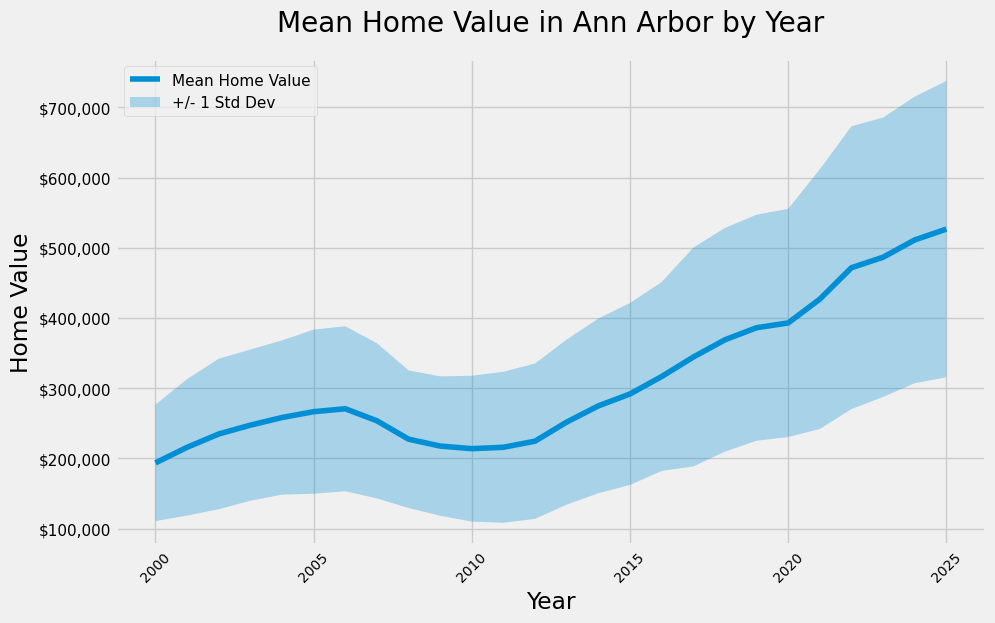

In [34]:
def create_chart_one():

    # prepare data for chart one
    chart_one_df = melted_df.copy()
    chart_one_df['Year'] = chart_one_df['Date'].dt.year
    yearly_data = chart_one_df.groupby(['Year'])['HomeValue'].agg(['mean', 'std']).reset_index()

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_data['Year'], yearly_data['mean'], label='Mean Home Value')
    plt.fill_between(yearly_data['Year'], yearly_data['mean'] - yearly_data['std'], yearly_data['mean'] + yearly_data['std'], alpha=0.3)

    # format y axis to be in $
    fmt = mtick.StrMethodFormatter('${x:,.0f}')
    plt.gca().yaxis.set_major_formatter(fmt)

    plt.xlabel('Year')
    plt.xticks(fontsize=10, rotation=45)
    plt.ylabel('Home Value')
    plt.title('Mean Home Value in Ann Arbor by Year', pad=20)
    plt.legend(['Mean Home Value', '+/- 1 Std Dev'])

create_chart_one()
plt.show()

### Second Chart: Price of Homes by Neighboorhood Over Time

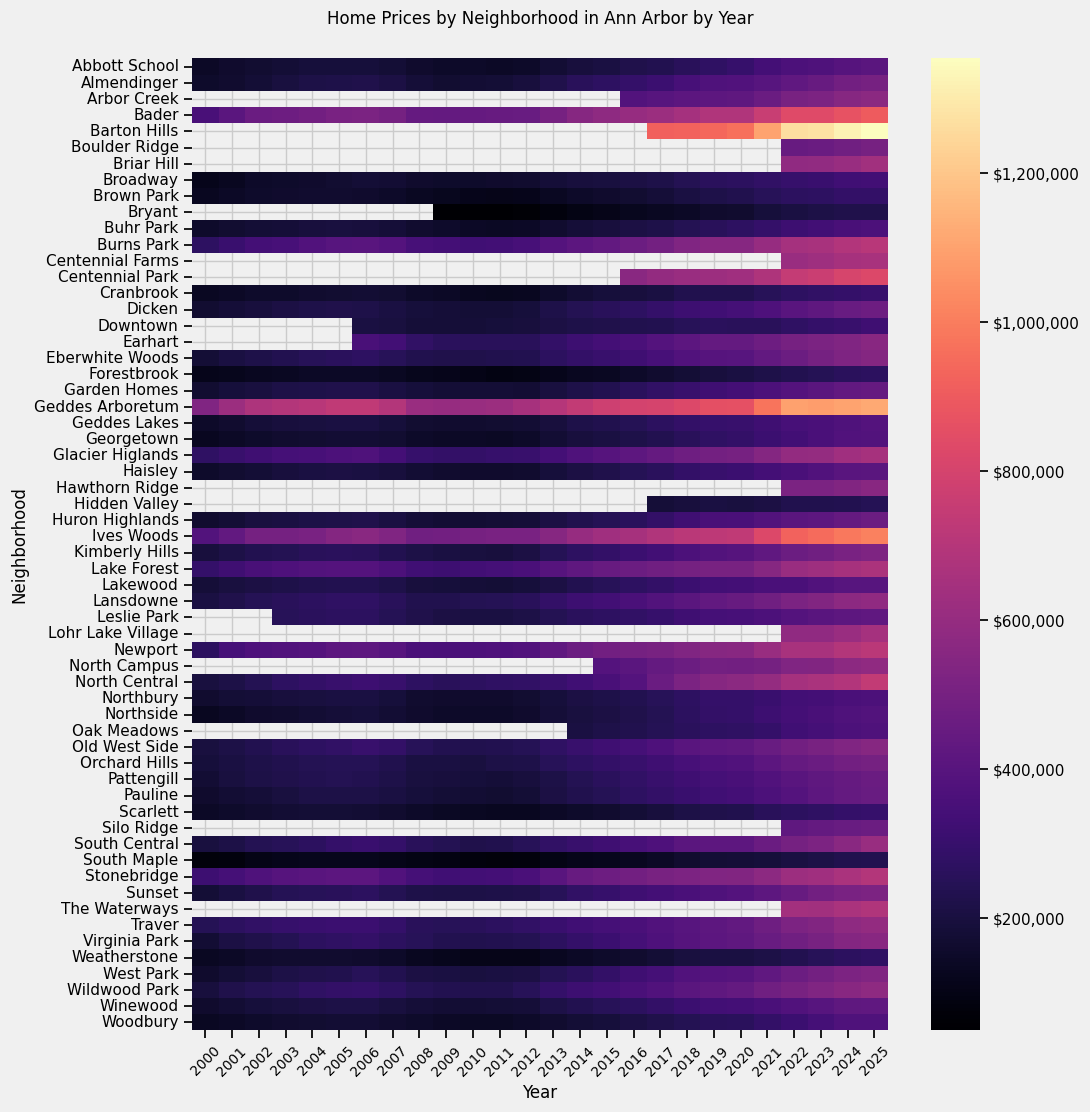

In [33]:
def create_chart_two(): 

    #prepare data for chart 2
    chart_two_df = melted_df.copy()
    chart_two_df['Year'] = chart_two_df['Date'].dt.year
    agg_df = chart_two_df.groupby(['RegionName', 'Year'])['HomeValue'].agg(['mean', 'std']).reset_index()
    neighborhood_data = agg_df.pivot_table(values='mean', index='RegionName', columns='Year')

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(10,12))
    sns.set_theme(style=style.library['fivethirtyeight'])

    # use seaborn heatmap functionality
    heatmap = sns.heatmap(neighborhood_data, cmap='magma')

    # set color bar format to $
    cbar = heatmap.collections[0].colorbar
    cbar.ax.yaxis.set_major_formatter('${x:,.0f}')

    # set titles and axis labels
    plt.title('Home Prices by Neighborhood in Ann Arbor by Year', pad=25)
    plt.xlabel('Year')
    plt.xticks(fontsize=10, rotation=45)
    plt.ylabel('Neighborhood')

create_chart_two()
plt.show()

### Third Chart: Examining trends in each neighborhood over more granular timeline

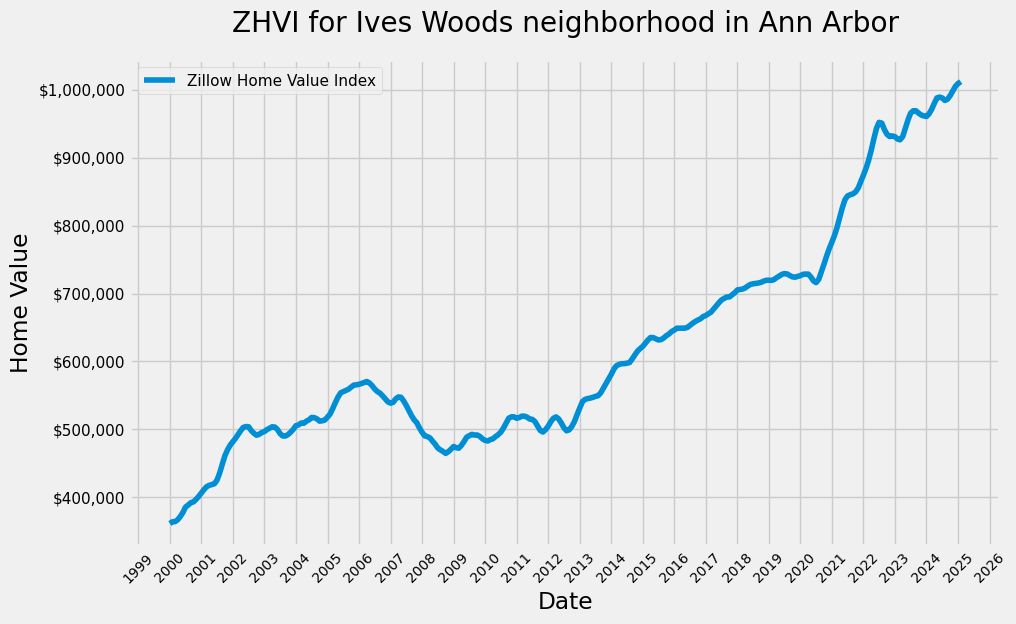

In [32]:
def create_chart_three(neighbohood):

    # prepare data for chart 3
    chart_three_df = melted_df.copy()
    chart_three_df['Month'] = chart_three_df['Date'].dt.to_period('M').dt.to_timestamp()
    chart_three_df['Year'] = chart_three_df['Date'].dt.year

    chart_three_df = chart_three_df[chart_three_df['RegionName'] == neighbohood]

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(10,6))
    plt.plot(chart_three_df['Month'], chart_three_df['HomeValue'], label='Home Value')

    # format y axis to be in $
    fmt = mtick.StrMethodFormatter('${x:,.0f}')
    plt.gca().yaxis.set_major_formatter(fmt)

    #format x axis to only show the years
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    plt.xlabel('Date')
    plt.xticks(fontsize=10, rotation=45)
    plt.ylabel('Home Value')
    plt.title('ZHVI for {} neighborhood in Ann Arbor'.format(neighbohood), pad=20)
    plt.legend(['Zillow Home Value Index'])

create_chart_three('Ives Woods')
plt.show()